In [55]:
import numpy as np
from scipy.optimize import root, broyden1
import matplotlib.pyplot as plt

In [60]:
def set_parameters(old_xpos_px_ypos_py, lam, tau) :
    oldx, oldpx, oldy, oldpy = old_xpos_px_ypos_py
    
    def hh_function(xpos_px_ypos_py) :
        x, px, y, py = xpos_px_ypos_py
        
        py_bar = (py + oldpy) / 2
        px_bar = (px + oldpx) / 2
        x_bar  = (x  + oldx)  / 2
        y_bar  = (y  + oldy)  / 2
        
        quant1 = (x  - oldx ) / tau - px_bar
        quant2 = (px - oldpx) / tau - x_bar + 2 * lam * x_bar * oldy
        quant3 = (y  - oldy ) / tau - py_bar
        quant4 = (py - oldpy) / tau - (-1) * y_bar - lam * (x * x - (y * y + y * oldy + oldy * oldy) / 3)
        
        return np.array([quant1, quant2, quant3, quant4])
    
    return hh_function

# Using scipy.optimize.root
def next_iteration(prev_iteration, lam, tau) :
    hh_function = set_parameters(prev_iteration, lam, tau) 
    iteration = root(hh_function, prev_iteration, method = 'broyden1')
    
    if iteration.success == False :
        print("Whoops")
        return False
    
    return iteration.x

# Using scipy.optmize.broyden1
# def next_iteration(prev_iteration, lam, tau) :
#     hh_function = set_parameters(prev_iteration, lam, tau)
#     solution = broyden1(hh_function, prev_iteration)
    
#     return solution

In [61]:
def hh_solution(initial_cond, time, lam) :
    # solution is a 4 X Number of Iterations array, in the form of 
    # # x position
    # # x velocity
    # # y position
    # # y velocity
    # time is a 1 X Number of iterations array, and lists the time that the nth
    # # iteration occurs
    # lam is a constant which appears in the henon heiles system.
    N = time.shape[0]
    solution = np.zeros((4,N))
    solution[:,0] = initial_cond
    
    for n in range(N-1) :
        tau = time[n+1] - time[n]
        sol = next_iteration(solution[:,n], lam, tau)
        
        solution[:,n+1] = sol
#         if sol == False :
#             return (solution, False, n)
#         else : 
#             solution[:,n+1] = sol
    
    return solution

In [62]:
time = np.linspace(0,10,1000)
solution = hh_solution(np.array([0,2,1,2]), time, 1)

print(solution)

[[ 0.00000000e+00  2.00195186e-02  4.00369714e-02 ...  1.66531328e+01
   1.56327700e+01  1.45089515e+01]
 [ 2.00000000e+00  1.99989980e+00  1.99958725e+00 ... -9.66169818e+01
  -1.07251504e+02 -1.17287439e+02]
 [ 1.00000000e+00  1.01991834e+00  1.03963036e+00 ...  3.34056560e+01
   3.37625272e+01  3.40247457e+01]
 [ 2.00000000e+00  1.97968360e+00  1.95877630e+00 ...  4.02415368e+01
   3.10613324e+01  2.13299181e+01]]


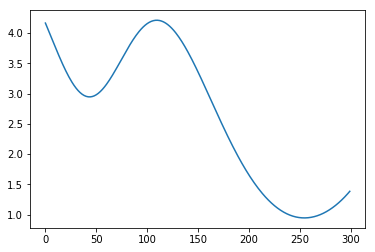

In [63]:
def conserved_quant(x,px,y,py,lam=1) :
    return (px * px + py * py + x * x + y * y) / 2 + lam * (x * x * y - y * y * y / 3)

plt.plot(conserved_quant(solution[0,0:300], solution[1,0:300], solution[2,0:300], solution[3,0:300]))